## Linear regression using gradient descent

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let us try to model generate random data for the model `y = 3x + 2` and then fit a linear model to predict the values of m and c.

## Generating the data

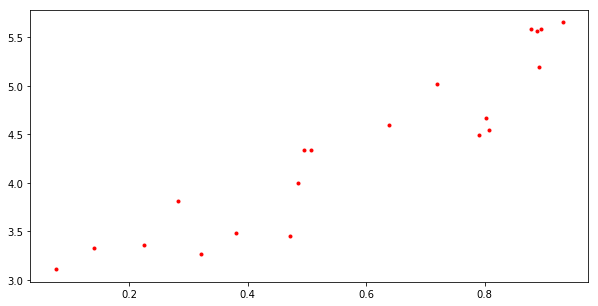

In [6]:
# Generating data
x = np.random.rand(20)
y = 3 * x + 2 + np.random.rand(20)

# Plotting data
plt.figure(figsize=(10,5))
plt.plot(x,y, 'r.')
plt.show()

In [7]:
# Writing the los function
def loss(y, y_pred):
    return np.sum(np.square(y-y_pred))

## Doing gradient descent using analytical derivative to find w, b

Let the input data be $$(x_i, y_i)$$

The loss function is given by 
$$ L (w, b) = \Sigma_i (y_i - y_{pred})^2$$

It can be rewritten as
$$ L (w, b) = \Sigma_i (y_i - (wx_i+b))^2$$

The derivatives would be:
$$ \dfrac{\partial L}{\partial w} = 2 \Sigma_i (y_i - (wx_i+b)) (-x_i)$$

$$\dfrac{\partial L}{\partial b} = 2 \Sigma_i (y_i - (wx_i+b)) (-1)$$

### building utility functions

In [70]:
def L_grad(x_data, y_data, w, b):
    grad1 = 2 * np.mean((y_data - (w*x_data+b))*(-x_data))
    grad2 = 2 * np.mean((y_data - (w*x_data+b))*(-1))
    return grad1, grad2

def L_grad_stocastic(x_data, y_data, w, b, batch_size = 4):
    inds = np.random.permutation(x_data.shape[0])
    x = x_data[inds[:4]]; 
    y = y_data[inds[:4]]; 
    grad1 = 2 * np.mean((y - (w*x+b))*(-x))
    grad2 = 2 * np.mean((y - (w*x+b))*(-1))
    return grad1, grad2
                    
def normalize_data(x_data):
    return (x_data-np.mean(x_data))/np.std(x_data)

## Normal gradient descent

w_final = 2.79, b_final - 2.75


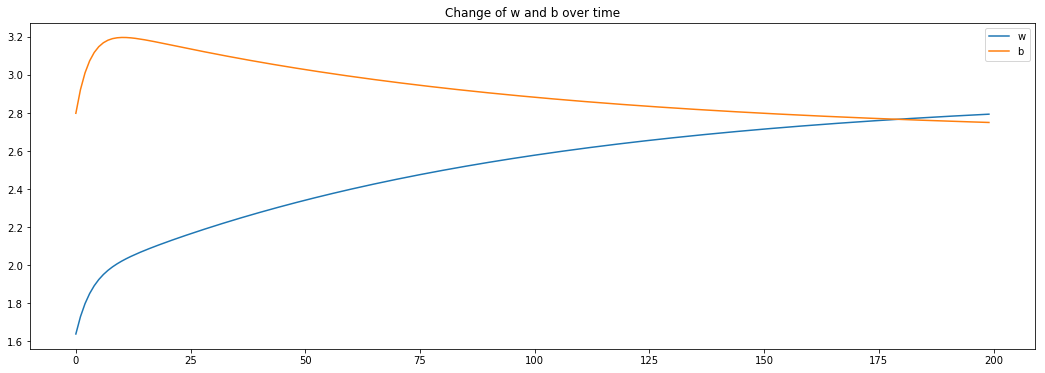

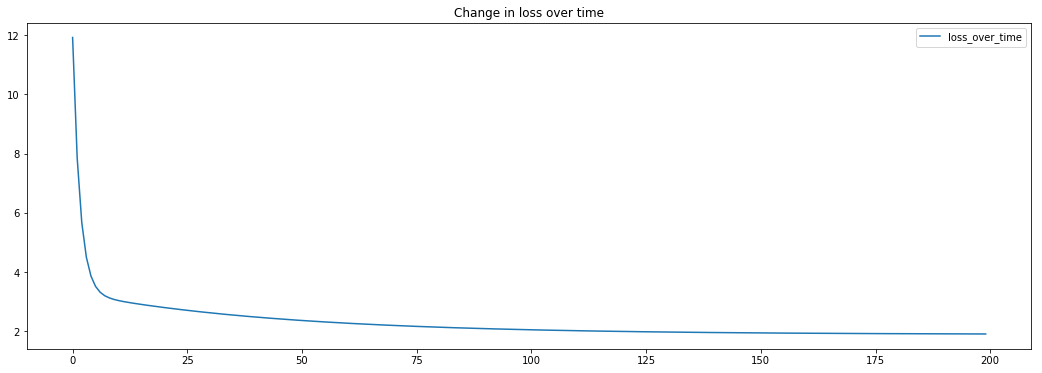

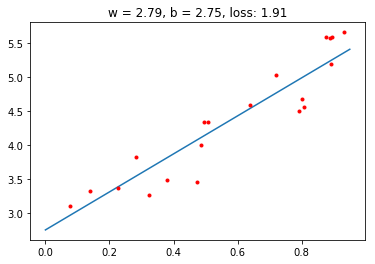

In [64]:
lr = 0.1
w0 = float(np.random.rand(1)*5)
b0 = float(np.random.rand(1)*5)
w_vec = []; b_vec = []; loss_vec = []
for i in range(0, 200):
    grad1, grad2 = L_grad(x, y, w0, b0)
    w0 = w0 - lr * grad1
    b0 = b0 - lr * grad2
    loss0 = loss(y, (w0*x+b0))
    
    w_vec.append(w0)
    b_vec.append(b0)
    loss_vec.append(loss0)
    
print("w_final = {:2.2f}, b_final - {:2.2f}".format(w0,b0))
    
# Visualizing change in w and b over time
plt.figure(figsize=(18,6))
plt.plot(w_vec, label='w')
plt.plot(b_vec, label='b')
plt.title('Change of w and b over time')
plt.legend(); plt.show()

# Visualizing loss over time
plt.figure(figsize=(18,6))
plt.plot(loss_vec, label='loss_over_time')
plt.title('Change in loss over time')
plt.legend(); plt.show()

# Visualizaing final result
w = w0; b = b0
x_range = np.arange(0,1,0.05)
y_range = w * x_range + b
y_pred = w * x + b
plt.plot(x_range, y_range)
plt.plot(x, y, 'r.')
plt.title('w = {:2.2f}, b = {:2.2f}, loss: {:2.2f}'.format(w, b, loss(y,y_pred)))
plt.show()

## Stocastic gradient descent

w_final = 2.93, b_final - 2.69


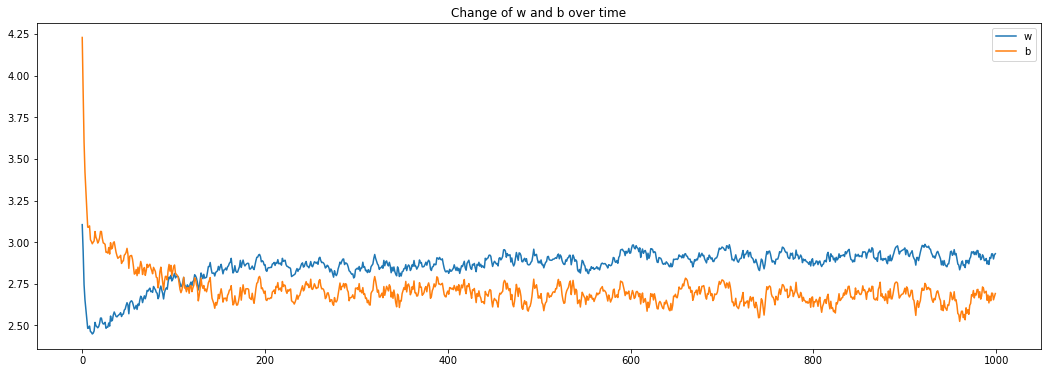

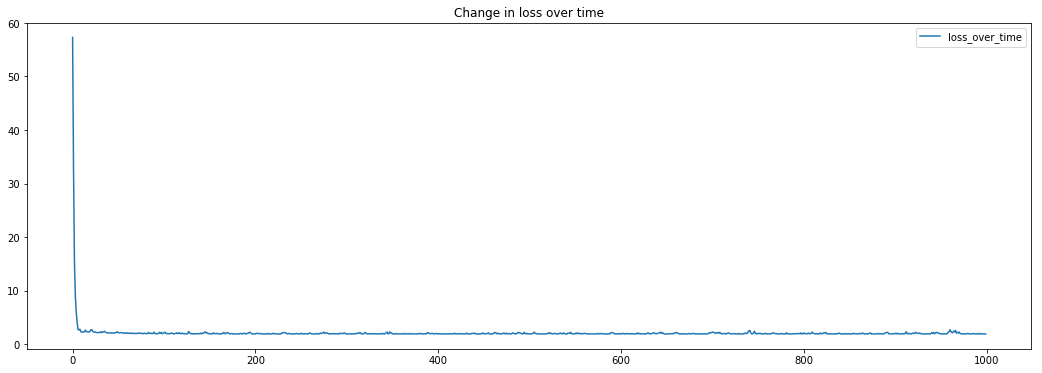

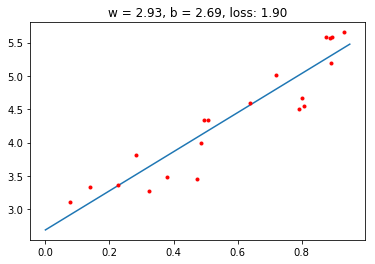

In [74]:
lr = 0.1
w0 = float(np.random.rand(1)*5)
b0 = float(np.random.rand(1)*5)
w_vec = []; b_vec = []; loss_vec = []
for i in range(0, 1000):
    grad1, grad2 = L_grad_stocastic(x, y, w0, b0)
    w0 = w0 - lr * grad1
    b0 = b0 - lr * grad2
    loss0 = loss(y, (w0*x+b0))
    
    w_vec.append(w0)
    b_vec.append(b0)
    loss_vec.append(loss0)
    
print("w_final = {:2.2f}, b_final - {:2.2f}".format(w0,b0))
    
# Visualizing change in w and b over time
plt.figure(figsize=(18,6))
plt.plot(w_vec, label='w')
plt.plot(b_vec, label='b')
plt.title('Change of w and b over time')
plt.legend(); plt.show()

# Visualizing loss over time
plt.figure(figsize=(18,6))
plt.plot(loss_vec, label='loss_over_time')
plt.title('Change in loss over time')
plt.legend(); plt.show()

# Visualizaing final result
w = w0; b = b0
x_range = np.arange(0,1,0.05)
y_range = w * x_range + b
y_pred = w * x + b
plt.plot(x_range, y_range)
plt.plot(x, y, 'r.')
plt.title('w = {:2.2f}, b = {:2.2f}, loss: {:2.2f}'.format(w, b, loss(y,y_pred)))
plt.show()